# Actividad Semanal 9: Reto equipo 29
- Ángel De Jesús Hernández Pascual Matricula:A01794256
- Jose Alberto Almada Gerardo Matricula:A01794415
- Profesor: María de la Paz Rico Fernández
- Fecha: 11/18/2022

Objetivo: Implementar conocimientos adquiridos a lo largo de curso en el desarrollo de un proyecto con datos reales. 

## Limpieza, análisis, visualización y agrupamiento.

Usando la base de datosde aguas subterranea previa mente limpiada en el ejercicio anterior, realizaremos lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
- ambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
-Explora que clasificador es el más optimo, ejemplo:
Decision trees
Random Forest.
-Determina el grado de exactitud a través del reporte de clasificación.
- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

# 1.- Base de datos de aguas subterraneas: Limpieza y normalizacion de datos

Importamos librerias

In [1]:
#Importamos librerias
##############################
import requests
import zipfile
import io
import pandas as pd
import numpy as np
##############################
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
##############################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
##############################
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn import metrics 
from sklearn.tree import export_graphviz
##############################
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing

Importamos base de datos

In [2]:
# Preparamos la base de datos
path = 'https://github.com/PosgradoMNA/actividades-del-projecto-equipo-29/blob/main/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip?raw=true'
path_request = requests.get(path, stream=True)
path_zip = zipfile.ZipFile(io.BytesIO(path_request.content))
path_zip.extractall("./")
directory = './Datos_de_calidad_del_agua_2020'
file = '/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(directory + file, encoding = "cp1252")

Limpieza de datos

In [3]:
#Copiar df a datos_aguas_subterraneas 
datos_aguas_subterraneas_2020= df.copy() 
# Decidimos eliminar SDT_mg/l, ya que todos sus valores son NAN
# Decidimos eliminar PERIODO, ya que todos sus valores son 2020
datos_aguas_subterraneas_2020.drop('SDT_mg/L', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('PERIODO', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('SDT_M_mg/L', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CALIDAD_SDT_ra', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CALIDAD_SDT_salin', axis = 1, inplace = True)
# Decidimos eliminar CUMPLE_CON..., ya que todos sus valores son 'Si'
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_ALC', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_COND', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_SDT_ra', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_SDT_salin', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_FLUO', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_DUR', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_CF', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_NO3', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_AS', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_CD', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_CR', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_HG', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_PB', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_MN', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_FE', axis = 1, inplace = True)

In [4]:
#Shape
datos_aguas_subterraneas_2020.shape

(1068, 37)

Normalizacion de datos y conversion a float

In [5]:
#Lossiguientes valores necesitan ser normalizados ya que tienen valores como <0.025 
# datos_aguas_subterraneas_2020['FLUORUROS_mg/L','COLI_FEC_NMP/100_mL','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','N_NO3_mg/L','DUR_mg/L','FE_TOT_mg/L']
#Ej.
datos_aguas_subterraneas_2020['FE_TOT_mg/L'].value_counts(),

(<0.025    401
 0.0288      4
 0.0492      4
 0.0471      3
 0.0564      3
          ... 
 0.1118      1
 0.0565      1
 0.3947      1
 0.0858      1
 0.1786      1
 Name: FE_TOT_mg/L, Length: 615, dtype: int64,)

In [6]:
#Normalizacion de datos y conversion a float.

#FLUORUROS_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['FLUORUROS_mg/L'] == '<0.2', 'FLUORUROS_mg/L'] = 0.19
datos_aguas_subterraneas_2020['FLUORUROS_mg/L'] = datos_aguas_subterraneas_2020['FLUORUROS_mg/L'].astype(float)

#COLI_FEC_NMP/100_mL
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL'] == '<1.1', 'COLI_FEC_NMP/100_mL'] = 1.09
datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL'] = datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL'].astype(float)

#AS_TOT_mg/L
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['AS_TOT_mg/L'] == '<0.01', 'AS_TOT_mg/L'] = 0.009
datos_aguas_subterraneas_2020['AS_TOT_mg/L'] = datos_aguas_subterraneas_2020['AS_TOT_mg/L'].astype(float)

#CD_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['CR_TOT_mg/L'] == '<0.005', 'CR_TOT_mg/L'] = 0.0049
datos_aguas_subterraneas_2020['CR_TOT_mg/L'] = datos_aguas_subterraneas_2020['CR_TOT_mg/L'].astype(float)

#HG_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['HG_TOT_mg/L'] == '<0.0005', 'HG_TOT_mg/L'] = 0.00049
datos_aguas_subterraneas_2020['HG_TOT_mg/L'] = datos_aguas_subterraneas_2020['HG_TOT_mg/L'].astype(float)

#PB_TOT_mg/L
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['PB_TOT_mg/L'] == '<0.005', 'PB_TOT_mg/L'] = 0.0049
datos_aguas_subterraneas_2020['PB_TOT_mg/L'] = datos_aguas_subterraneas_2020['PB_TOT_mg/L'].astype(float)

#MN_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['MN_TOT_mg/L'] == '<0.0015', 'MN_TOT_mg/L'] = 0.00149
datos_aguas_subterraneas_2020['MN_TOT_mg/L'] = datos_aguas_subterraneas_2020['MN_TOT_mg/L'].astype(float)

#N_NO3_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['N_NO3_mg/L'] == '<0.02', 'N_NO3_mg/L'] = 0.019
datos_aguas_subterraneas_2020['N_NO3_mg/L'] = datos_aguas_subterraneas_2020['N_NO3_mg/L'].astype(float)

#DUR_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['DUR_mg/L'] == '<20', 'DUR_mg/L'] = 19.99
datos_aguas_subterraneas_2020['DUR_mg/L'] = datos_aguas_subterraneas_2020['DUR_mg/L'].astype(float)

#FE_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['FE_TOT_mg/L'] == '<0.025', 'FE_TOT_mg/L'] = .0249
datos_aguas_subterraneas_2020['FE_TOT_mg/L'] = datos_aguas_subterraneas_2020['FE_TOT_mg/L'].astype(float)

#CD_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['CD_TOT_mg/L'] == '<0.003', 'CD_TOT_mg/L'] = .002
datos_aguas_subterraneas_2020['CD_TOT_mg/L'] = datos_aguas_subterraneas_2020['CD_TOT_mg/L'].astype(float)

#MN_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['CD_TOT_mg/L'] == '<0.0015', 'CD_TOT_mg/L'] = .0014
datos_aguas_subterraneas_2020['CD_TOT_mg/L'] = datos_aguas_subterraneas_2020['CD_TOT_mg/L'].astype(float)

In [7]:
#Remplazamos los siguientes NAN values por la media
datos_aguas_subterraneas_2020['ALC_mg/L'].fillna( value=datos_aguas_subterraneas_2020['ALC_mg/L'].mean(),inplace= True)
datos_aguas_subterraneas_2020['CONDUCT_mS/cm'].fillna( value=datos_aguas_subterraneas_2020['CONDUCT_mS/cm'].mean(),inplace= True)

#Remplazamos los siguientes NAN values por no definido
datos_aguas_subterraneas_2020['N_NO3_mg/L'].fillna( value=datos_aguas_subterraneas_2020['N_NO3_mg/L'].fillna('4.31'),inplace= True)
datos_aguas_subterraneas_2020['DUR_mg/L'].fillna( value=datos_aguas_subterraneas_2020['DUR_mg/L'].fillna('347.93'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_ALC'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_ALC'].fillna('No definido'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_CONDUC'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_CONDUC'].fillna('No definido'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_DUR'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_DUR'].fillna('No definido'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_N_NO3'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_N_NO3'].fillna('No definido'),inplace= True)

#Remplazamos los siguientes NAN values en 'contaminantes' por sin contaminar
datos_aguas_subterraneas_2020['CONTAMINANTES'].fillna( value=datos_aguas_subterraneas_2020['CONTAMINANTES'].fillna('SinContaminar'),inplace= True)

Revision de datos procesados.

In [8]:
#Verificamos qué columna tiene datos faltantes y cuántos por columna
data= datos_aguas_subterraneas_2020.copy()
"Datos faltantes y cuántos por columna:",data.isna().sum()

('Datos faltantes y cuántos por columna:', CLAVE                  0
 SITIO                  0
 ORGANISMO_DE_CUENCA    0
 ESTADO                 0
 MUNICIPIO              0
 ACUIFERO               0
 SUBTIPO                0
 LONGITUD               0
 LATITUD                0
 ALC_mg/L               0
 CALIDAD_ALC            0
 CONDUCT_mS/cm          0
 CALIDAD_CONDUC         0
 FLUORUROS_mg/L         0
 CALIDAD_FLUO           0
 DUR_mg/L               0
 CALIDAD_DUR            0
 COLI_FEC_NMP/100_mL    0
 CALIDAD_COLI_FEC       0
 N_NO3_mg/L             0
 CALIDAD_N_NO3          0
 AS_TOT_mg/L            0
 CALIDAD_AS             0
 CD_TOT_mg/L            0
 CALIDAD_CD             0
 CR_TOT_mg/L            0
 CALIDAD_CR             0
 HG_TOT_mg/L            0
 CALIDAD_HG             0
 PB_TOT_mg/L            0
 CALIDAD_PB             0
 MN_TOT_mg/L            0
 CALIDAD_MN             0
 FE_TOT_mg/L            0
 CALIDAD_FE             0
 SEMAFORO               0
 CONTAMINANTES        

In [9]:
# Data head
data.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,0.00049,Potable - Excelente,0.0049,Potable - Excelente,0.00149,Potable - Excelente,0.0891,Potable - Excelente,Verde,SinContaminar
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,0.00049,Potable - Excelente,0.0049,Potable - Excelente,0.00149,Potable - Excelente,0.0249,Potable - Excelente,Verde,SinContaminar
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,0.00049,Potable - Excelente,0.0049,Potable - Excelente,0.00149,Potable - Excelente,0.0249,Potable - Excelente,Rojo,"FLUO,AS,"
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,0.00049,Potable - Excelente,0.0049,Potable - Excelente,0.00149,Potable - Excelente,0.0249,Potable - Excelente,Verde,SinContaminar
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0.00049,Potable - Excelente,0.0049,Potable - Excelente,0.00149,Potable - Excelente,0.0249,Potable - Excelente,Rojo,"NO3,"


In [10]:
#Describe
datos_aguas_subterraneas_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.61719,25.510285,32.677713
ALC_mg/L,1068.0,235.633759,116.655014,26.64000,164.048750,215.82500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1138.953013,1242.056683,50.40000,505.500000,822.50000,1321.250000,18577.000000
FLUORUROS_mg/L,1068.0,1.074083,1.924973,0.19000,0.267175,0.50350,1.139850,34.803300
COLI_FEC_NMP/100_mL,1068.0,355.483455,2052.458207,1.09000,1.090000,1.09000,13.250000,24196.000000
AS_TOT_mg/L,1068.0,0.018855,0.035420,0.00900,0.009000,0.00900,0.009000,0.452200
CD_TOT_mg/L,1068.0,0.002032,0.000928,0.00200,0.002000,0.00200,0.002000,0.032110
CR_TOT_mg/L,1068.0,0.013196,0.154396,0.00490,0.004900,0.00490,0.004900,5.003200
HG_TOT_mg/L,1068.0,0.000548,0.000468,0.00049,0.000490,0.00049,0.000490,0.014150


In [11]:
#Correlacion
datos_aguas_subterraneas_2020.corr()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,FLUORUROS_mg/L,COLI_FEC_NMP/100_mL,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
LONGITUD,1.000000,-0.760204,0.166915,0.060803,-0.123175,-0.084443,-0.079289,0.043603,0.058941,0.041326,-0.004078,-0.036142,0.021929
LATITUD,-0.760204,1.000000,-0.079797,0.053506,0.131850,0.063130,0.092856,-0.052851,-0.058679,-0.103395,-0.046100,-0.036290,-0.041593
ALC_mg/L,0.166915,-0.079797,1.000000,0.219654,0.068930,-0.016448,0.073248,0.031961,-0.014279,0.067465,0.015256,0.129862,0.043423
CONDUCT_mS/cm,0.060803,0.053506,0.219654,1.000000,-0.025106,0.017807,-0.004204,0.028396,0.004407,0.058880,0.024146,0.095927,0.083178
FLUORUROS_mg/L,-0.123175,0.131850,0.068930,-0.025106,1.000000,0.003522,0.445609,-0.015639,-0.005210,-0.026597,-0.032587,-0.049705,-0.009981
COLI_FEC_NMP/100_mL,-0.084443,0.063130,-0.016448,0.017807,0.003522,1.000000,0.037676,-0.000432,-0.008850,-0.007789,0.022404,-0.005325,0.003046
AS_TOT_mg/L,-0.079289,0.092856,0.073248,-0.004204,0.445609,0.037676,1.000000,-0.009474,-0.009802,-0.010563,-0.023538,0.017077,0.014075
CD_TOT_mg/L,0.043603,-0.052851,0.031961,0.028396,-0.015639,-0.000432,-0.009474,1.000000,-0.001830,-0.004241,-0.002968,-0.003898,-0.001035
CR_TOT_mg/L,0.058941,-0.058679,-0.014279,0.004407,-0.005210,-0.008850,-0.009802,-0.001830,1.000000,0.005978,-0.001822,-0.005089,0.000627
HG_TOT_mg/L,0.041326,-0.103395,0.067465,0.058880,-0.026597,-0.007789,-0.010563,-0.004241,0.005978,1.000000,0.014981,0.640929,0.877079


#2.-Análisis general de las features importances

In [12]:
#Análisis general de las features importances
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing

- Seleccion de variables independientes X (numeric_features) y dependiente Y (semáforo)

In [13]:
#X-y
numeric_features = ['COLI_FEC_NMP/100_mL','FLUORUROS_mg/L','ALC_mg/L','CONDUCT_mS/cm','CD_TOT_mg/L','FE_TOT_mg/L','MN_TOT_mg/L','PB_TOT_mg/L','HG_TOT_mg/L','CR_TOT_mg/L','AS_TOT_mg/L','N_NO3_mg/L','DUR_mg/L']
y_column = ['SEMAFORO']
X = data[numeric_features]

Mostramos variables independientes X

In [14]:
#X head
X.head()

,COLI_FEC_NMP/100_mL,FLUORUROS_mg/L,ALC_mg/L,CONDUCT_mS/cm,CD_TOT_mg/L,FE_TOT_mg/L,MN_TOT_mg/L,PB_TOT_mg/L,HG_TOT_mg/L,CR_TOT_mg/L,AS_TOT_mg/L,N_NO3_mg/L,DUR_mg/L
0,1.09,0.9766,229.990,940.0,0.002,0.0891,0.00149,0.0049,0.00049,0.0049,0.0161,4.184656,213.732
1,1.09,0.9298,231.990,608.0,0.002,0.0249,0.00149,0.0049,0.00049,0.0049,0.0134,5.75011,185.0514
2,1.09,1.8045,204.920,532.0,0.002,0.0249,0.00149,0.0049,0.00049,0.0049,0.0370,1.449803,120.719
3,1.09,1.1229,327.000,686.0,0.002,0.0249,0.00149,0.0049,0.00049,0.0050,0.0154,1.258597,199.879
4,291.00,0.2343,309.885,1841.0,0.002,0.0249,0.00149,0.0049,0.00049,0.0049,0.0090,15.672251,476.9872


- Cambiamos a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

In [15]:
#ambiamos a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
label_encoder = preprocessing.LabelEncoder()
y = df[y_column]
# Encode labels in column 'species'.
y['SEMAFORO']= label_encoder.fit_transform(df['SEMAFORO'])
  
y['SEMAFORO'].unique()
y['SEMAFORO'].value_counts(),

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(2    434
 1    387
 0    247
 Name: SEMAFORO, dtype: int64,)

##Arbol de decisiones

Dividimos los datos entre entrenamiento y prueba.


In [16]:
#Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=4)
X_train.head()

,COLI_FEC_NMP/100_mL,FLUORUROS_mg/L,ALC_mg/L,CONDUCT_mS/cm,CD_TOT_mg/L,FE_TOT_mg/L,MN_TOT_mg/L,PB_TOT_mg/L,HG_TOT_mg/L,CR_TOT_mg/L,AS_TOT_mg/L,N_NO3_mg/L,DUR_mg/L
420,1.09,0.5840,225.000,509.0,0.002,0.06229,0.00875,0.0049,0.00155,0.01448,0.009,0.779,268.0
571,1.09,2.1518,185.370,637.0,0.002,0.02490,0.00149,0.0049,0.00049,0.00490,0.009,1.520907,83.5548
477,10.00,2.9349,114.975,414.0,0.002,0.13040,0.01200,0.0049,0.00049,0.00490,0.009,1.196746,53.8542
347,1.09,0.6251,303.690,1479.0,0.002,0.56982,0.00149,0.0152,0.00049,0.00490,0.009,1.9832,51.31
1053,1.09,0.4638,214.620,1095.0,0.002,0.03040,0.00149,0.0049,0.00049,0.00490,0.009,1.392795,326.568


In [17]:
#Revisamos los datos de entrenamiento
X_train.shape, y_train.shape

((747, 13), (747, 1))

In [18]:
##Revisamos los datos de entrenamiento
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
COLI_FEC_NMP/100_mL,747.0,357.149063,1991.476461,1.09000,1.09000,1.09000,15.500000,24196.00000
FLUORUROS_mg/L,747.0,1.019036,1.596132,0.19000,0.26535,0.50590,1.086900,21.23750
ALC_mg/L,747.0,232.861377,112.352668,47.04000,161.69500,215.00000,287.245000,1650.00000
CONDUCT_mS/cm,747.0,1109.451422,1146.251913,50.40000,494.50000,802.00000,1310.000000,18577.00000
CD_TOT_mg/L,747.0,0.002045,0.001109,0.00200,0.00200,0.00200,0.002000,0.03211
FE_TOT_mg/L,747.0,0.482634,6.588994,0.02490,0.02490,0.04840,0.179415,178.61500
MN_TOT_mg/L,747.0,0.076026,0.426301,0.00149,0.00149,0.00149,0.009050,8.98200
PB_TOT_mg/L,747.0,0.005167,0.002705,0.00490,0.00490,0.00490,0.004900,0.04900
HG_TOT_mg/L,747.0,0.000559,0.000551,0.00049,0.00049,0.00049,0.000490,0.01415
CR_TOT_mg/L,747.0,0.008809,0.025268,0.00490,0.00490,0.00490,0.004900,0.59100


In [19]:
# Transformacion numerica
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


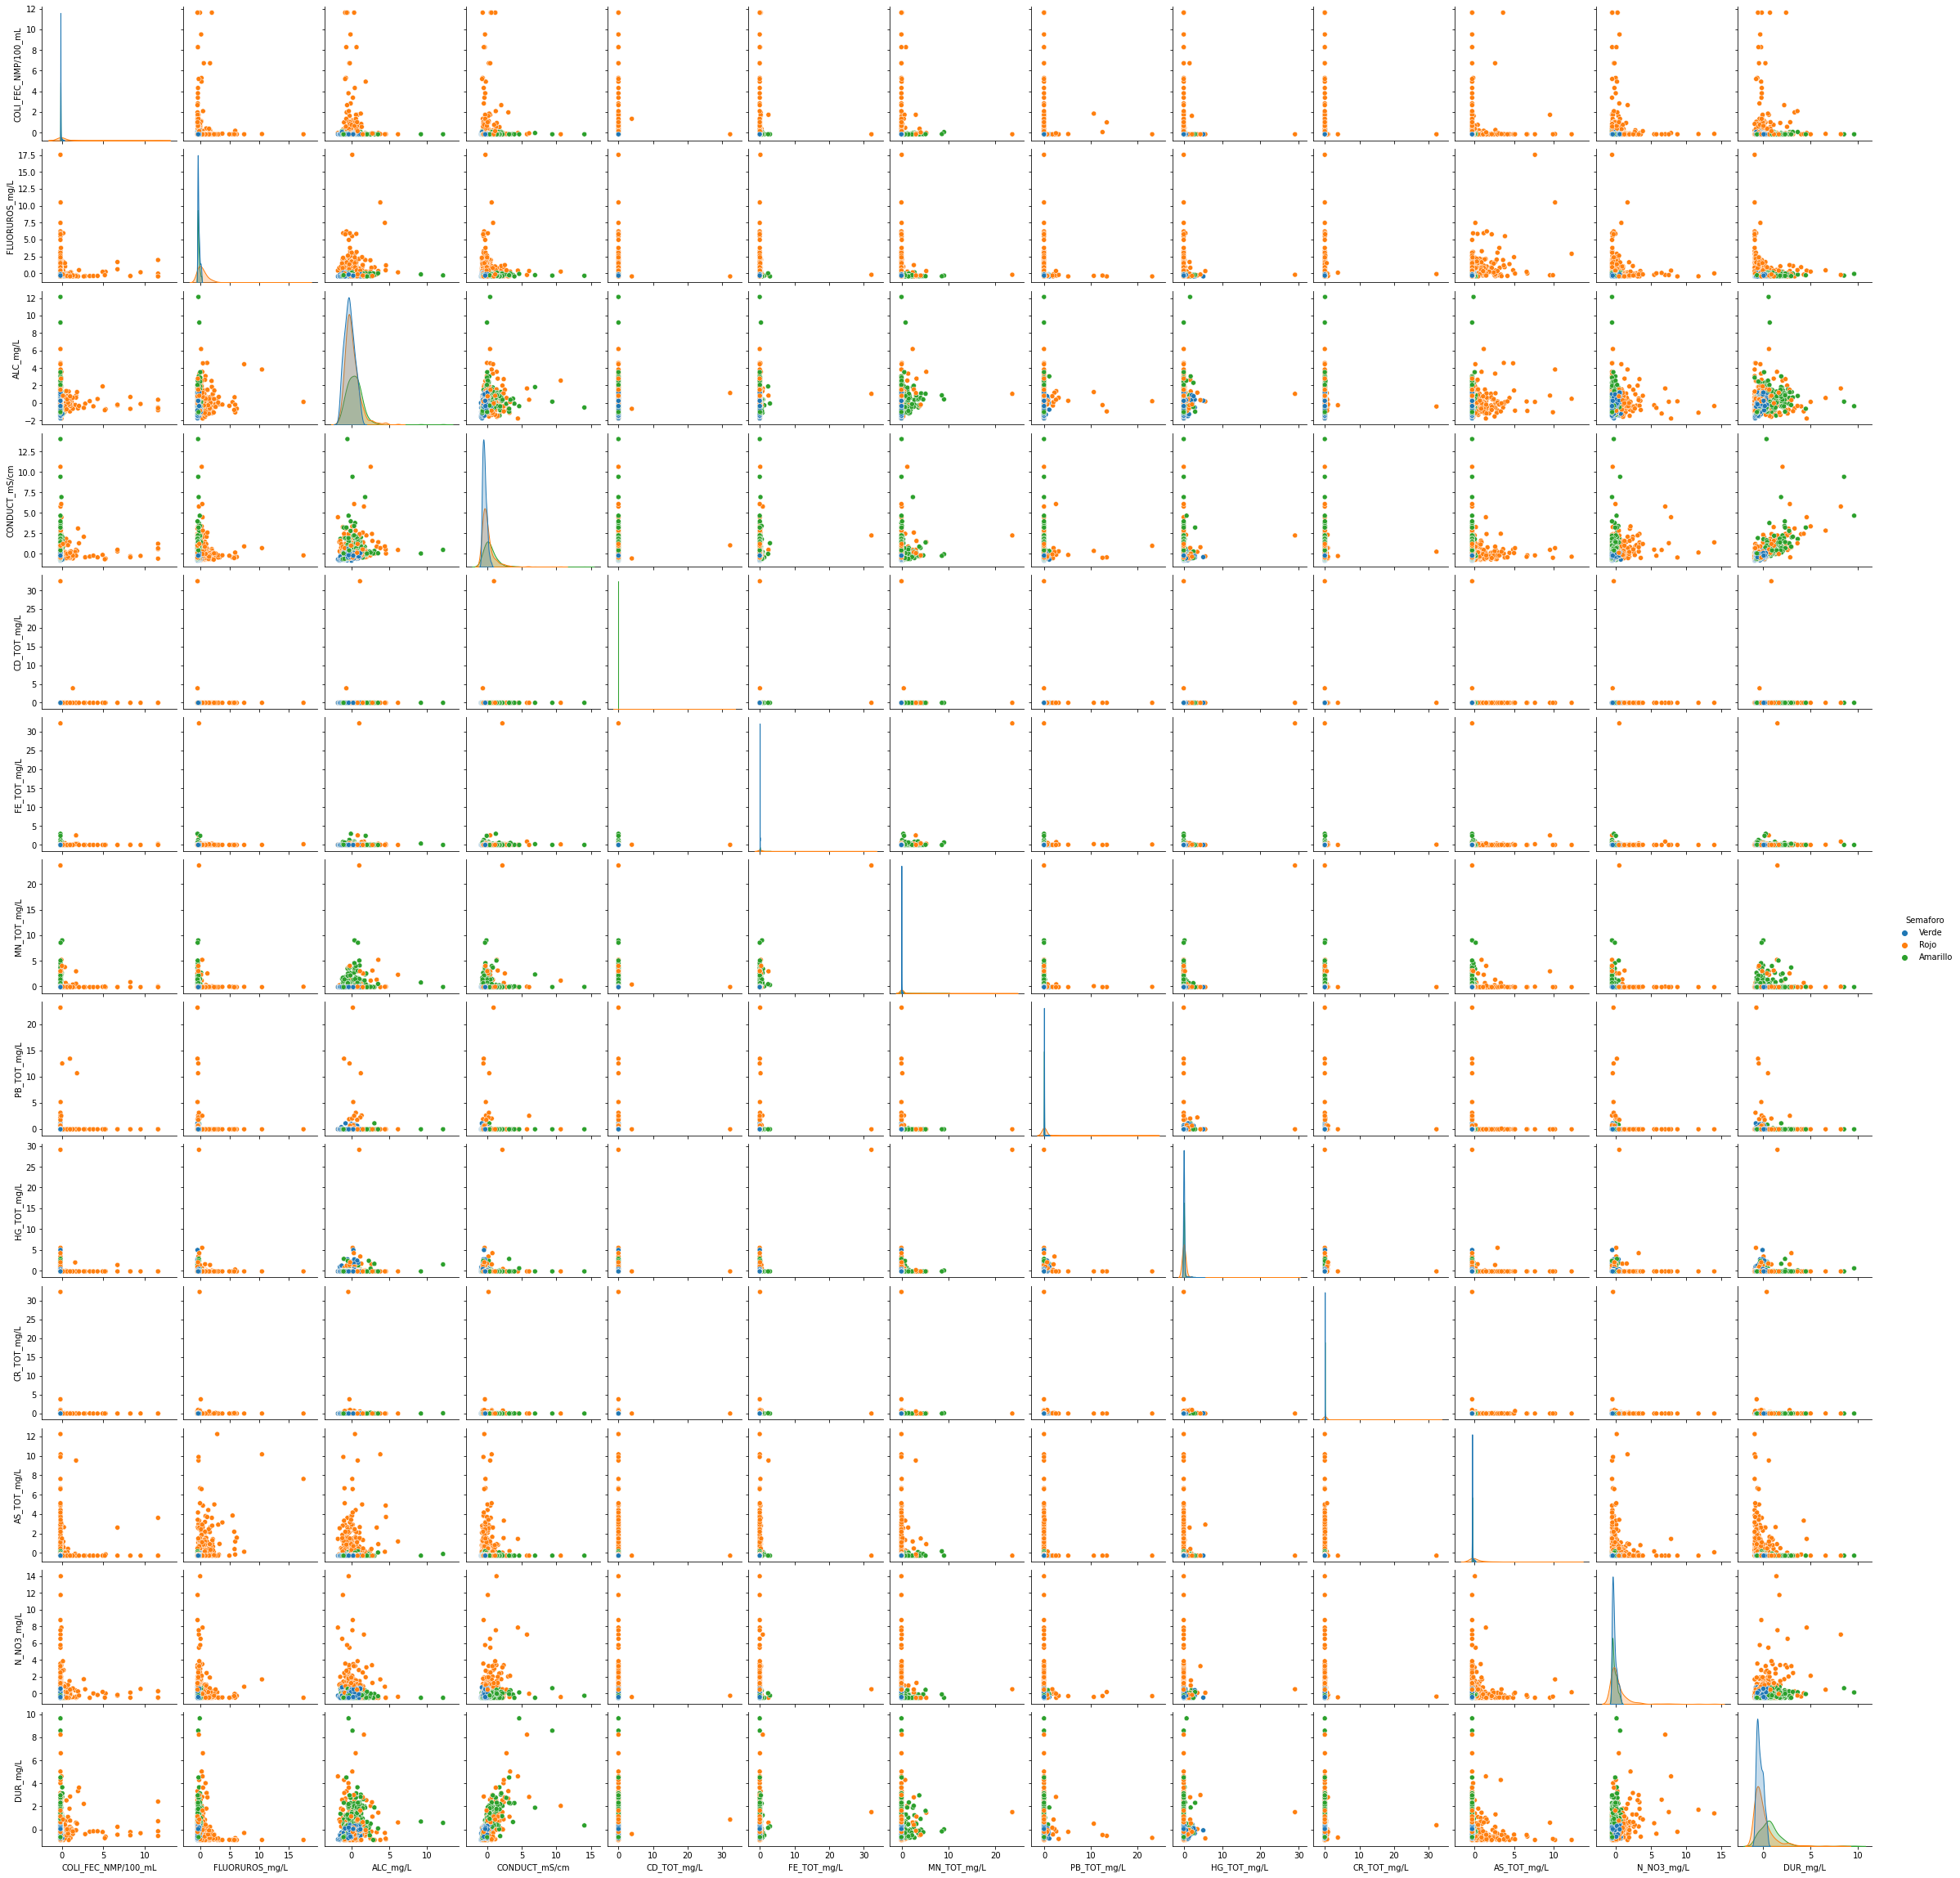

In [20]:
#Normalizacion
data_ = numeric_transformer.fit_transform(X)
dataTransform = pd.DataFrame(data_ , columns = X.columns)
dataTransform['Semaforo'] = df['SEMAFORO']
sns.pairplot(dataTransform, hue='Semaforo', size=2.5);

 Generamos un modelo de decisión tree.

In [21]:
#Decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# recopilamos cada una de las columnas para el algoritmo
randomfclassifier = RandomForestClassifier(n_estimators=500, random_state=42)
randomfclassifier.fit(X, y)
s=[]
n=[]
for score, name in zip(randomfclassifier.feature_importances_, X.columns):
  s.append(score)
  n.append(name)
# variables independientes de mayor relevancia.
scores= pd.DataFrame(n,s)
scores.sort_index(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,0
0.216790,FLUORUROS_mg/L
0.150547,DUR_mg/L
0.115671,AS_TOT_mg/L
0.109840,N_NO3_mg/L
0.085893,COLI_FEC_NMP/100_mL
0.085354,CONDUCT_mS/cm
0.084178,FE_TOT_mg/L
0.072415,MN_TOT_mg/L
0.040306,ALC_mg/L
0.019716,CR_TOT_mg/L


In [22]:
#Pipeline
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=40,
                                            min_samples_leaf=2,
                                            max_depth = 11))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.951


In [23]:
# Xtrain Decision tree
X_train

,COLI_FEC_NMP/100_mL,FLUORUROS_mg/L,ALC_mg/L,CONDUCT_mS/cm,CD_TOT_mg/L,FE_TOT_mg/L,MN_TOT_mg/L,PB_TOT_mg/L,HG_TOT_mg/L,CR_TOT_mg/L,AS_TOT_mg/L,N_NO3_mg/L,DUR_mg/L
430,1.09,0.5110,270.00,738.0,0.002,0.04985,0.00876,0.0049,0.00049,0.02173,0.0090,5.205,312.0
621,40.00,0.7004,374.36,1392.0,0.002,0.02490,0.00149,0.0049,0.00049,0.00490,0.0090,2.1712,149.99
321,1.09,0.4702,317.55,678.0,0.002,0.03870,0.38430,0.0049,0.00049,0.00490,0.0090,0.490224,199.8992
261,1.09,0.5241,410.70,602.0,0.002,0.63200,0.08450,0.0049,0.00049,0.00490,0.0270,0.019,469.0704
308,1.09,0.3210,255.00,567.0,0.002,0.04920,0.00149,0.0049,0.00049,0.00490,0.1663,0.153,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,1.09,1.6185,153.70,2599.0,0.002,0.17690,0.01700,0.0049,0.00049,0.00490,0.0090,0.043,45.39
466,1.09,3.2470,194.91,536.0,0.002,0.02490,0.00640,0.0049,0.00049,0.00490,0.0090,1.522011,53.8542
121,1.09,0.3560,370.11,1203.0,0.002,0.02490,0.00149,0.0049,0.00072,0.00490,0.0090,6.168069,534.5528
1044,1.09,0.2158,385.82,1558.0,0.002,0.24112,0.00149,0.0049,0.00049,0.00490,0.0090,3.2185,653.26


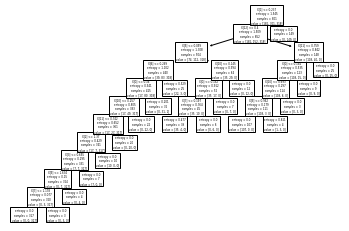

<Figure size 864x864 with 0 Axes>

In [24]:
# tree plot
tree.plot_tree(clf['classifier']) 
plt.figure(figsize=(12,12)) 
plt.show()

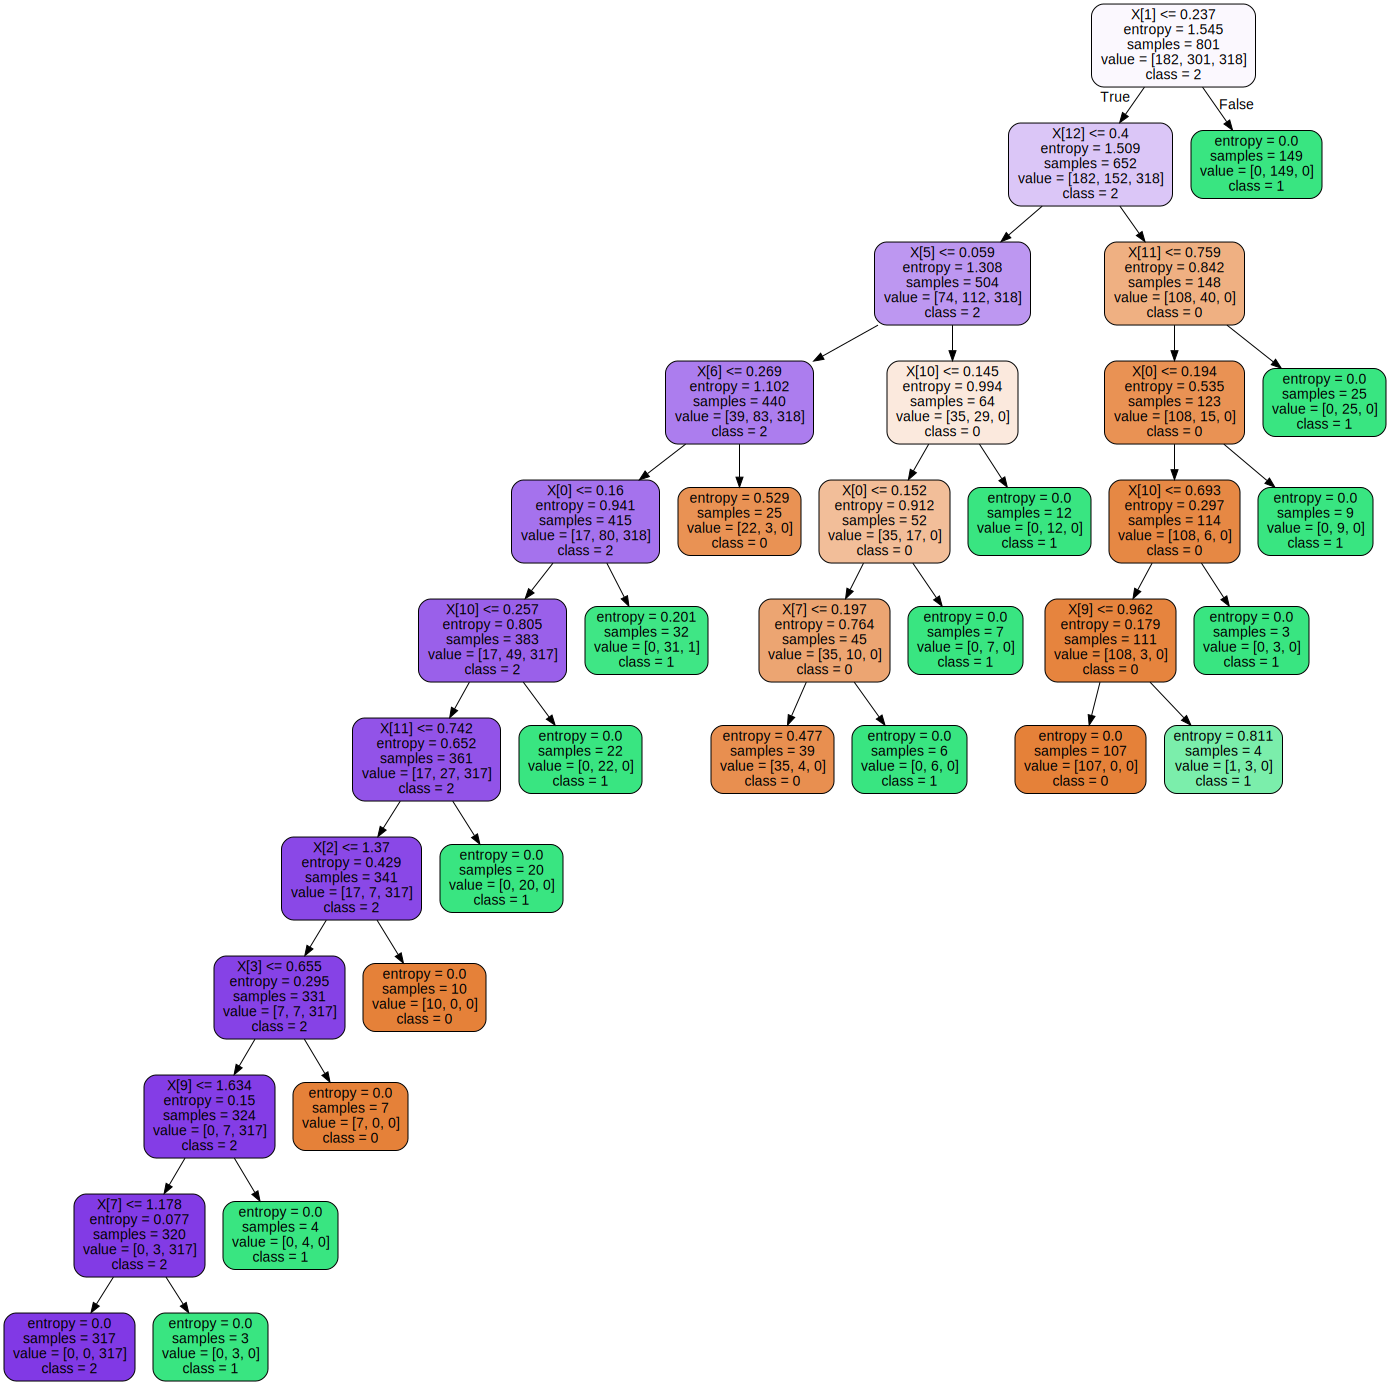

In [25]:
#Graphviz
import graphviz
dot_data = tree.export_graphviz(clf['classifier'], class_names=['0', '1','2'], out_file=None,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

Revisamoslos resultados de el modelo  a través de una matriz de confusión.

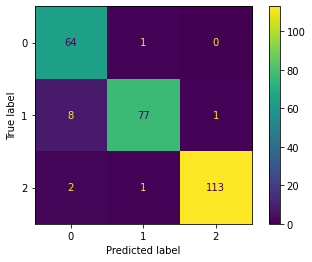

In [26]:
# Matriz de confuciones para arboles de decisiones
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [27]:
# Reporte de  arboles de decision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        65
           1       0.97      0.90      0.93        86
           2       0.99      0.97      0.98       116

    accuracy                           0.95       267
   macro avg       0.94      0.95      0.95       267
weighted avg       0.96      0.95      0.95       267



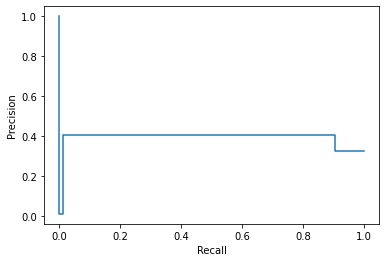

In [28]:
# Reporte de precision call arboles de decision
prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Random Forest
Realizamos un análisis general de las features importances a traves de random forest.

In [29]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


model score: 0.955


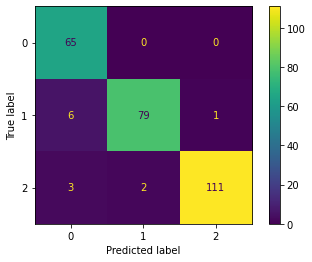

In [30]:
#Grafica de Confusion random forest
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

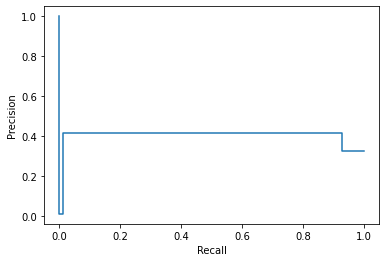

In [31]:
#Grafica de presicion recall y reporte de clasificacion
prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

Determinamos el grado de exactitud

In [32]:
# Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        65
           1       0.98      0.92      0.95        86
           2       0.99      0.96      0.97       116

    accuracy                           0.96       267
   macro avg       0.95      0.96      0.95       267
weighted avg       0.96      0.96      0.96       267



In [33]:
# Grado de exactitud
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9550561797752809


##Importancia de las variables

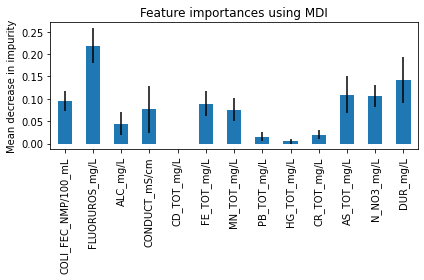

In [34]:
#Importancias de las variables
fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in clf['classifier'].estimators_], axis=0)
importances = clf['classifier'].feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()